<a href="https://colab.research.google.com/github/Kmmm0923/Training-TSLA/blob/b0693d8be3a7388214fe75cace1f50d05aed0e51/TSLA_Training_(LSTM).ipynb" target="_parent">
<img src="https://colab.research.google.com/assets/colab-badge.svg" 
alt="Open In Colab"/></a>

In [1]:
import csv
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from dataclasses import dataclass 
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import files
uploaded = files.upload()

Saving TSLA(Full).csv to TSLA(Full).csv


In [3]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['TSLA(Full).csv']))

print(df2)

            Date    Open    High     Low   Close  Adj_Close     Volume
0     2018-01-09   22.34   22.59   21.83   22.25      22.25  107199000
1     2018-01-10   22.15   22.47   22.00   22.32      22.32   64648500
2     2018-01-11   22.35   22.99   22.22   22.53      22.53   99682500
3     2018-01-12   22.58   22.69   22.24   22.41      22.41   72376500
4     2018-01-16   22.50   23.00   22.32   22.67      22.67   97114500
...          ...     ...     ...     ...     ...        ...        ...
1253  2022-12-30  119.95  124.48  119.75  123.18     123.18  157304500
1254  2023-01-03  118.47  118.80  104.64  108.10     108.10  231402800
1255  2023-01-04  109.11  114.59  107.52  113.64     113.64  180389000
1256  2023-01-05  110.51  111.75  107.16  110.34     110.34  157986300
1257  2023-01-06  103.00  114.39  101.81  113.06     113.06  220575900

[1258 rows x 7 columns]


In [16]:
print(df2.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj_Close    float64
Volume         int64
dtype: object


In [20]:
df3 = df2[['Date','Open', 'Close', 'Volume']]
print(df3)

            Date    Open   Close     Volume
0     2018-01-09   22.34   22.25  107199000
1     2018-01-10   22.15   22.32   64648500
2     2018-01-11   22.35   22.53   99682500
3     2018-01-12   22.58   22.41   72376500
4     2018-01-16   22.50   22.67   97114500
...          ...     ...     ...        ...
1253  2022-12-30  119.95  123.18  157304500
1254  2023-01-03  118.47  108.10  231402800
1255  2023-01-04  109.11  113.64  180389000
1256  2023-01-05  110.51  110.34  157986300
1257  2023-01-06  103.00  113.06  220575900

[1258 rows x 4 columns]


In [12]:
print(df3.dtypes)

Date      float64
Open      float64
Close     float64
Volume    float64
dtype: object


In [24]:
df3['Date'] = df3['Date'].apply(lambda x: float(x.split()[0].replace('-', '')))

<ipython-input-24-ec9db0f6f4db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Date'] = df3['Date'].apply(lambda x: float(x.split()[0].replace('-', '')))


Text(0.5, 1.0, 'Volume Graph')

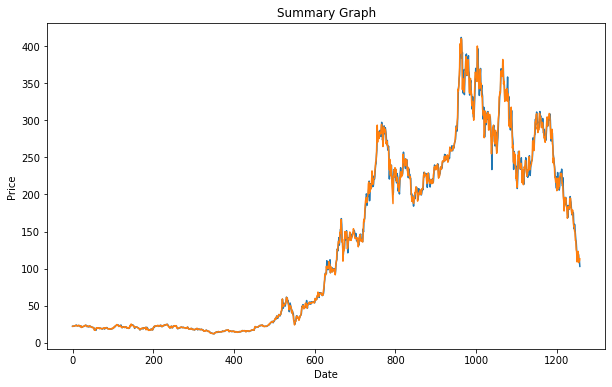

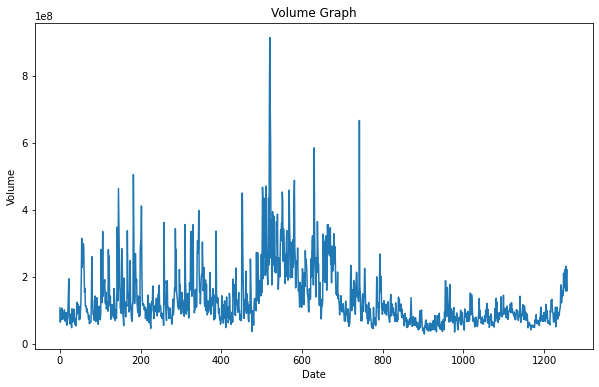

In [26]:
plt.figure(figsize = (10,6))
plt.plot(df3['Open'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(df3['Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Summary Graph')
plt.figure(figsize = (10,6))
plt.plot(df3['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume Graph')

In [27]:
ms = MinMaxScaler()
df3[df3.columns] = ms.fit_transform(df3)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
